Aharouni Refaël, Biradepan Brunthaban, Berry Eva, Hilmann Rylan $-$ DIA1
<br><br>

<p align="center"><b> Report of the Green AI Project</b></p><br><br>




<br><br>&nbsp;&nbsp;&nbsp;&nbsp;In this notebook, Refaël Aharouni, Eva Berry, Brunthaban Biradepan and Rylan Hilmann will study the `global_climate_events_economic_impact_2020_2025.csv` dataset. The goal is to answer two regression problematics using this dataset. While the first one will predict the number of deaths for the different climatic events, the second one will deal with the prediction of the amount of the economic impact for the different climatic events.<br>Once this is done, we will compare the results for developed countries and not-developed countries.
<br>&nbsp;&nbsp;&nbsp;Let us first import the libraries that will be used for this project. We can then read the the dataset with the *pd.read_csv* method and store it in the *temp* variable.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
temp = pd.read_csv('global_climate_events_economic_impact_2020_2025.csv')

Now, we can print the first lines of the dataset to see what it looks like using *head* method.

In [3]:
temp.head()

,event_id,date,year,month,country,event_type,severity,duration_days,affected_population,deaths,injuries,economic_impact_million_usd,infrastructure_damage_score,response_time_hours,international_aid_million_usd,latitude,longitude,total_casualties,impact_per_capita,aid_percentage
0,EV01539,2020-01-01,2020,1,Japan,Tsunami,1,1,420956,0,2,0.01,4.9,11,0.0,85.4321,138.7206,2,0.02,0.0
1,EV02303,2020-01-01,2020,1,Qatar,Hurricane,1,4,3276,1,10,0.00,3.4,5,0.0,-32.0370,14.0111,11,0.00,0.0
2,EV01796,2020-01-02,2020,1,Canada,Drought,3,6,120382,0,9,0.10,8.9,10,0.0,78.4213,-112.7556,9,0.83,0.0
3,EV00175,2020-01-02,2020,1,Poland,Heatwave,6,16,185527,2,37,1.27,17.8,7,0.0,73.6564,115.0650,39,6.85,0.0
4,EV01115,2020-01-03,2020,1,UAE,Wildfire,4,16,176642,2,27,2.01,18.7,17,0.0,52.6458,101.5023,29,11.38,0.0


<br><br>

# **I. Analysis and preprocessing of the data**

&nbsp;&nbsp;&nbsp;&nbsp;We will begin this project by analyzing and preprocessing the data.
<br>
## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**A. Variables definition**
&nbsp;&nbsp;&nbsp;The first thing to do is understanding the variables that we are dealing with in this dataset using the *columns.tolist()* method.<br>However, before doing it, let us add a new feature called *"Developed"* that will contain two features: the first one will represent the name of the country (qualitative nominale), while the second will indicate if the country is developed (1) or not (0) (binary feature).

In [4]:
df = temp.merge(pd.read_csv("Developed_Countries.csv", sep = ";"), on = "country", how = "left")
print(df.columns.tolist())

['event_id', 'date', 'year', 'month', 'country', 'event_type', 'severity', 'duration_days', 'affected_population', 'deaths', 'injuries', 'economic_impact_million_usd', 'infrastructure_damage_score', 'response_time_hours', 'international_aid_million_usd', 'latitude', 'longitude', 'total_casualties', 'impact_per_capita', 'aid_percentage', 'Developed']


&nbsp;&nbsp;&nbsp;From the previous result, we can draw up a list of the features and their type:<br>
*   **event_id:** This feature represents the ID of the event (it is composed of "EV" for "event" and the number of the event itself). Therefore, it is a *qualitative nominale* feature.<br><br>
*   **date:** This feature corresponds to the complete date of the beginning of the event (yyyy-mm-dd), this is the reason why it is a *datetime* feature.<br><br>
*   **year:** This variable refers to the year of the beginning of the event, which is why it is *quantitative discrete*. Because the dataset is about the events between 2020 and 2025, the set of possible values taken will be $[|2020, 2025|]$. <br><br>
*   **month:** This feature corresponds to the month of the beginning of the event. Because it is a number between 1 (January) and 12 (December), it is a *quantitative discrete* feature. <br><br>
*   **country:** Representing the country in which the climatic event occurred, this feature is *qualitative nominale*. <br><br>
*   **event_type:** Corresponding to the type of event that occurred (tsunami, hurricane, volcanic eruption...), this variable's type is *qualitative nominale*.<br><br>
*   **severity:** Characterizing the severity of the climatic event on a scale from 1 to 10, this feature's type is *quantitative discrete*.<br><br>
*   **duration_days:** This feature refers to the number of days during which the climatic event occurred. Therefore, it can be classified as a *quantitative discrete* feature.<br><br>
*   **affected_population:** This feature corresponds to the number of people that were (directly or indirectly) touched by the event. Because it can theoretically take any values between 0 and 8.2 B (the global population in 2025, according to Worldometer), this variable will be considered as *quantitative continuous*.<br><br>
*  **deaths, injuries** and **total_casualties:** Those features indicate the number of deaths, injuries and casualties (deaths + casualties) caused by the climatic event. Just as the *affected population*, this feature can take in theory any values between 0 and 8.2 B. Therefore, they will also be considered as *quantitative continuous*.<br><br>
*  **economic_impact_million_usd**, **infrastructure_damage_score** and **impact_per_capita**: Refering respectively to the financial, material (on a scope from 0 to 100) and per-person damages of the events (in million dolars), they are *quantitative continuous* features.<br><br>
*  **latitude** and **longitude:** Those two variables represent the exact events' localisation. Therefore, they are *quantitative continuous* as well. <br><br>
*  **international_aid_million_usd:** and **aid_percentage**: Those two features correspond to the international amount of money transferred to help coping with the events (in million dolars) and the percentage of economic impact covered by aid. Just like the precedent features, they are both *quantitative continuous*.<br><br>
*  **Developed:** As we saw before, this binary variable indicates if the country of the event is developed (1) or not (0).

<br>

## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**B. Number of columns, rows and values**

&nbsp;&nbsp;&nbsp;In order to know the exact number of columns and rows, we can use the *df.shape* method. The first argument will be the number of lines (number of individuals) while the second one will represent the number of columns (number of features).

In [5]:
df.shape

(3000, 21)

Therefore, we have in this dataset 3 000 individuals (3 000 events that occurred) and 21 features (21 characteristics of the events) that we saw before. <br>&nbsp;&nbsp;&nbsp;Using the *size* function also allows us to know that our climatic events dataset contains 63 000 values, which is normal because we have 3 000 individuals and 21 features.

In [6]:
df.size

63000

<br>

## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**C. Missing values and deletion of unnecessary features**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Let us now use *.info()* and *.isnull.sum()* to see if our dataset contains any missing values.

In [7]:
print(df.info())
print("\nNumber of missing values for each feature:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   event_id                       3000 non-null   object 
 1   date                           3000 non-null   object 
 2   year                           3000 non-null   int64  
 3   month                          3000 non-null   int64  
 4   country                        3000 non-null   object 
 5   event_type                     3000 non-null   object 
 6   severity                       3000 non-null   int64  
 7   duration_days                  3000 non-null   int64  
 8   affected_population            3000 non-null   int64  
 9   deaths                         3000 non-null   int64  
 10  injuries                       3000 non-null   int64  
 11  economic_impact_million_usd    3000 non-null   float64
 12  infrastructure_damage_score    3000 non-null   f

From what we can see, this dataset does not seem to contain any missing values.<br>However, sometimes, there is no empty/null cells because they are called in another way (like "No Information", "null", "Null"...), especially for qualitative features. To be sure of it, let us use *df["name_feature"].value_counts()* command on each feature.

In [8]:
for j in df.columns:
  print(f"{df[j].value_counts()}\n\n")

event_id
EV01539    1
EV01823    1
EV00962    1
EV02290    1
EV00249    1
          ..
EV00679    1
EV01293    1
EV01872    1
EV00446    1
EV01186    1
Name: count, Length: 3000, dtype: int64


date
2021-09-23    7
2022-10-13    6
2020-08-17    6
2023-05-15    6
2024-04-01    6
             ..
2021-07-15    1
2023-09-23    1
2023-09-24    1
2023-09-25    1
2025-09-15    1
Name: count, Length: 1596, dtype: int64


year
2023    553
2024    542
2020    523
2021    508
2022    500
2025    374
Name: count, dtype: int64


month
7     298
4     295
1     282
6     266
3     257
8     252
5     247
9     243
2     226
12    219
10    217
11    198
Name: count, dtype: int64


country
Japan             86
Portugal          75
Czech Republic    70
Egypt             70
Denmark           69
Singapore         68
France            68
Kazakhstan        67
Hungary           67
New Zealand       66
Canada            65
Israel            64
Netherlands       64
Sweden            63
Switzerland       63
S

We remark that for qualitative features, there is indeed no missing values and no inconsistency (additional parasite spaces, characters not in utf-8 format, spelling mistakes or incoherent uppercases...). Nonetheless, for the quantitative features, when we look at *aid_percentage* and *international_aid_million_usd* features, we remark that they both contain 2 998 times the value "0" and just twice other values than "0" ("22.9" and "4.9" for *aid_percentage* and "164.61" and "6.55" for the international aid). Because they don't give a lot of information and are not the two target variables (*"economic_impact_million_usd"* and *"deaths"* are), we will simply delete them with *drop()* method.

In [9]:
df = df.drop(columns = ["international_aid_million_usd", "aid_percentage"])

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Moreover, for both problematics, we do not need the number of injuries (only the number of deaths for the first one), so we can also delete it. Because *total_casualties* is the sum of the number of deaths and of injuries (which is useless here), we can delete it as well.

In [10]:
df = df.drop(columns = ["injuries", "total_casualties"])

In [11]:
print(f"This finally gives us {df.shape[1]} features.")

This finally gives us 17 features.


<br>

## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**D. Inconsistencies and outliers**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Let us now deal with the dataset's inconsistencies.
<br>However, before doing this, we noticed something about the feature *date*. Even if its type is supposed to be *DateTime*, the *info* command precendently used proved us that this variable was currently an object. Therefore, for this feature, we first need to convert it in DateTime using *pd.to_DateTime()* method. Because we already have a feature about the year and the month of the beginning of the climatic event, we can create another feature called "day" that will only keep the day of the beginning of the event from the current "date" feature. Finally, we will be able to drop "date", which will be useless at that moment.

In [12]:
df["date"] = pd.to_datetime(df["date"])
df["day"] = df["date"].dt.day.astype("int64")
df = df.drop(columns = ["date"])

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We can now return to the inconsistencies analysis. For the qualitative features, this step has already been done in the precedent part.
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;For the quantitative features, the goal is also to ensure that there is not any misspelling. If the result of the operation returns empty DataFrames, then it will be good for the feature in question. Otherwise, the inconsistency will be corrected manually. Here is the list of inconsistencies that we are going to treat:
<br>
* **For the day:** We must first check that the value is between $[|1, 31|]$.Then, we will examine the month.<br>
&nbsp;&nbsp;&nbsp; $-$ If the individual's month is April, June, September, or November (which have 30 days), we will need to ensure that the day is between 1 and 30.<br>
&nbsp;&nbsp;&nbsp; $-$ The case where the individual's month is January, March, May, July, August, October or December has already been treated (when checking that the day was in $[|1, 31|]$).<br>
&nbsp;&nbsp;&nbsp; $-$ If the individual's month is February, we must ensure that the day belongs to $[|1, 29|]$ if the year is leap and $[|1, 28|]$ otherwise.<br><br>
* **For the year:** The dataset is about the climatic events of $[|2020, 2025|]$, so all the values must be in this interval.<br><br>
* **For month:** It must be integers in $[|1, 12|]$.<br><br>
* **For severity:** It must be between 1 and 10 (because the scale is on 1-10).<br><br>
* **For duration_days, affected_population, deaths, response_time_hours:** It must be a positive number.<br><br>
* **For economic_impact_million_usd and impact_per_capita:** It must be a positive real number.<br><br>
* **For infrastructure_damage_score:** It must be a positive real number between 0 and 100.

In [13]:
# For the day:
def leap_year(year):
  return (year % 400 == 0) or (year % 4 == 0 and year % 100 != 0)

global_inconsistent_day = df[(df["day"] < 1) | (df["day"] > 31)] # Day in [|1, 31|]
inconsistent_30_day = df[df["month"].isin([4, 6, 9, 11]) & (df["day"] > 30)] # (April, June, September or November) and day in [|1, 30|]
inconsistent_day_february_leap = df[
      (df["month"] == 2) # Month = February
      & (df["year"].apply(leap_year)) # Leap year
      & (df["day"] > 29)] # Day in [|1, 29|]

inconsistent_day_february_not_leap = df[
      (df["month"] == 2) # Month = February
      & (~df["year"].apply(leap_year)) # Not-leap year
      & (df["day"] > 28)] # Day in [|1, 28|]

inconsistent_day = pd.concat([global_inconsistent_day, inconsistent_30_day,
                              inconsistent_day_february_leap, inconsistent_day_february_not_leap])
print("Inconsistent day:\n", inconsistent_day)

# For the other variables:
inconsistent_year = df[(df["year"] < 2020) | (df["year"] > 2025)]
inconsistent_month = df[(df["month"] < 1) | (df["month"] > 12)]
inconsistent_severity = df[(df["severity"] < 1) | (df["severity"] > 10)]
inconsistent_duration = df[df["duration_days"] < 0]
inconsistent_population = df[df["affected_population"] < 0]
inconsistent_deaths = df[df["deaths"] < 0]
inconsistent_response_time = df[df["response_time_hours"] < 0]
inconsistent_economic = df[df["economic_impact_million_usd"] < 0]
inconsistent_infra = df[(df["infrastructure_damage_score"] < 0) | (df["infrastructure_damage_score"] > 100)]
inconsistent_per_capita = df[df["impact_per_capita"] < 0]

print("Inconsistent year:\n", inconsistent_year)
print("Inconsistent month:\n", inconsistent_month)
print("Inconsistent severity:\n", inconsistent_severity)
print("Inconsistent duration_days:\n", inconsistent_duration)
print("Inconsistent affected_population:\n", inconsistent_population)
print("Inconsistent deaths:\n", inconsistent_deaths)
print("Inconsistent response_time_hours:\n", inconsistent_response_time)
print("Inconsistent economic_impact_million_usd:\n", inconsistent_economic)
print("Inconsistent infrastructure_damage_score:\n", inconsistent_infra)
print("Inconsistent impact_per_capita:\n", inconsistent_per_capita)


Inconsistent day:
 Empty DataFrame
Columns: [event_id, year, month, country, event_type, severity, duration_days, affected_population, deaths, economic_impact_million_usd, infrastructure_damage_score, response_time_hours, latitude, longitude, impact_per_capita, Developed, day]
Index: []
Inconsistent year:
 Empty DataFrame
Columns: [event_id, year, month, country, event_type, severity, duration_days, affected_population, deaths, economic_impact_million_usd, infrastructure_damage_score, response_time_hours, latitude, longitude, impact_per_capita, Developed, day]
Index: []
Inconsistent month:
 Empty DataFrame
Columns: [event_id, year, month, country, event_type, severity, duration_days, affected_population, deaths, economic_impact_million_usd, infrastructure_damage_score, response_time_hours, latitude, longitude, impact_per_capita, Developed, day]
Index: []
Inconsistent severity:
 Empty DataFrame
Columns: [event_id, year, month, country, event_type, severity, duration_days, affected_popul

Therefore, no inconsistency is to be seen.
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We can now check to see if there are any outliers by displaying the boxplot for all quantitative features. The outliers will be the points outside of the whiskers (two straight lines at the extremities of the graphic).

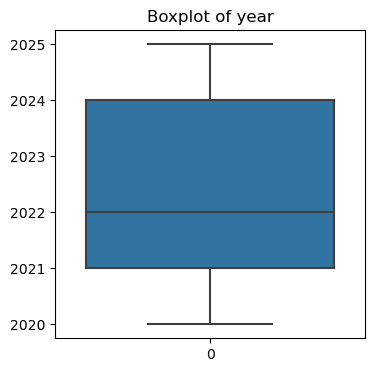

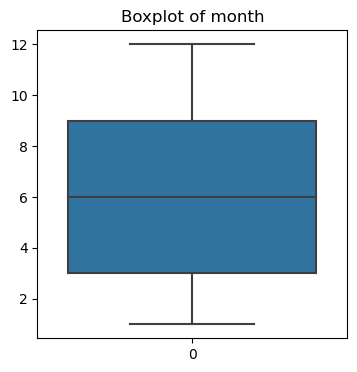

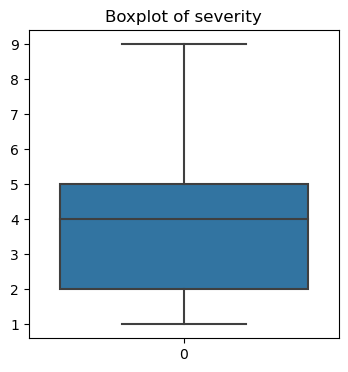

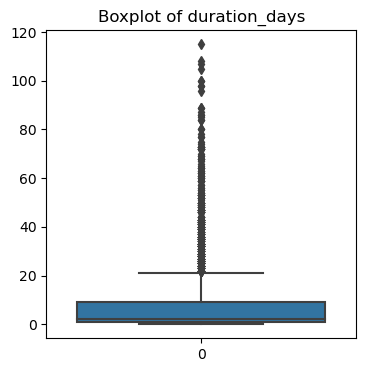

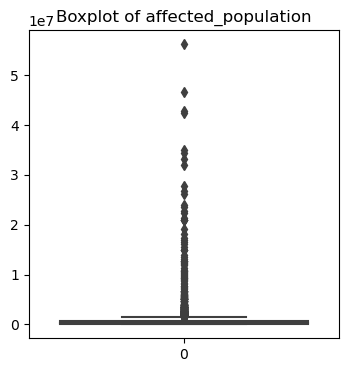

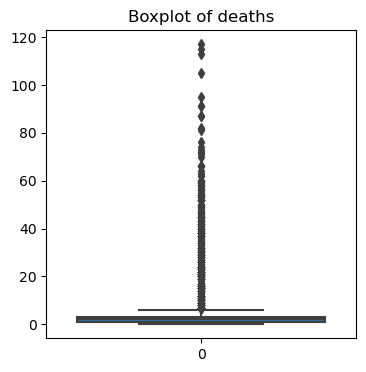

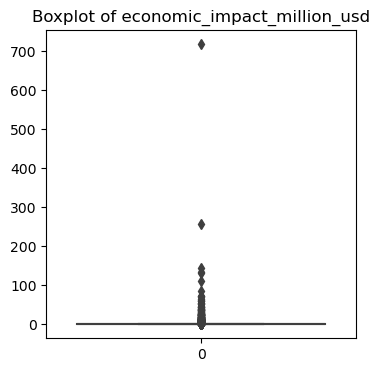

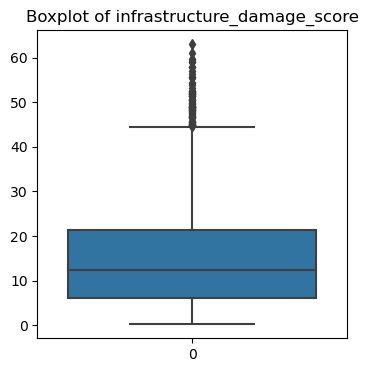

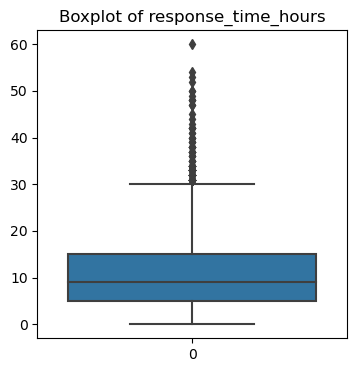

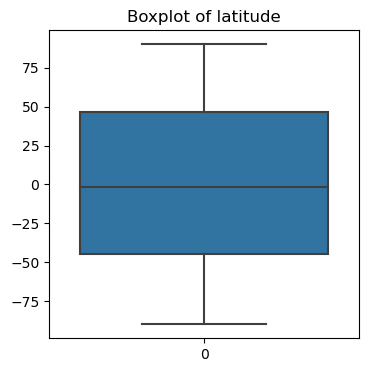

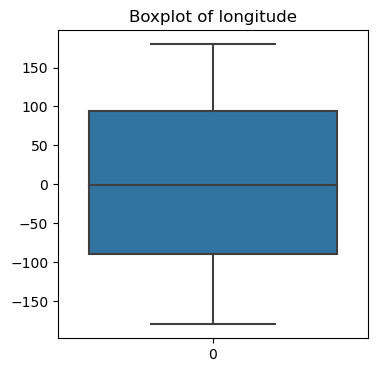

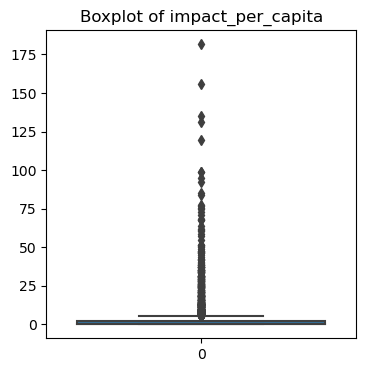

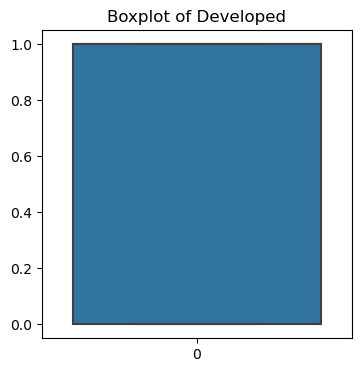

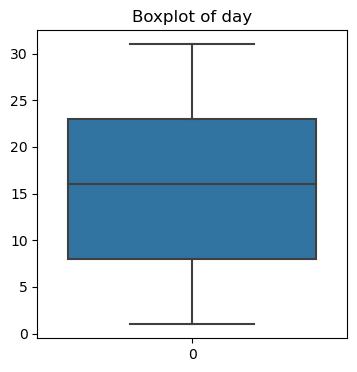

In [14]:
for j in df.select_dtypes(include = ["int64", "float64"]).columns: # We select the quantitative features
  plt.figure(figsize = (4, 4)) # Creation of a new figure
  sns.boxplot(df[j]) # Display of boxplot
  plt.title(f"Boxplot of {j}")
  plt.show()

From those boxplots and the use of *np.quantile(df, $\alpha/4$) with $\alpha \in [|1, 3|]$* to calculate the $\alpha$-th quantile, here is what we understand for the outliers for each feature:
* **Year**, **day**, **month**, **severity**, **latitude**, **longitude** and **Developed**: No outliers are to be seen.<br><br>
* **duration_days:** All three quartile boxes span are between 0 ($Q_1$) and 9 ($Q_3$), which means that 75% of events lasted at maximum ten days. The fact that the upper whisker is 21 ($= Q_3 + 1.5(Q_3 - Q_1) = 9 + 1.5 \times 8)$ makes every event that lasted more than 22 days outliers (with some events' duration that were 115 (the maximum)).<br><br>
* **affected_population:** All the events that strictly affected more than approximately 1 438 726 people (the upper whisker).<br><br>
* **deaths:** All the events that strictly caused more than 6 deaths (the upper whisker).<br><br>
* **economic_impact_million_usd:** All the climatic events that had a economic impact strictly greater than $1.31 M.<br><br>
* **infrastructure_damage_score:** All the events with an infrastructure damage score strictly greater than 45.<br><br>
* **response_time_hours:** All the climatic events with a response time that took strictly more than approximately 31 hours.<br><br>
* **impact_per_capita:** All the events that strictly costed more than approximately \$12 per person.

<br>

## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**E. Duplicated values**

&nbsp;&nbsp;&nbsp;By using *df.duplicated.sum()* method, we are able to know that there is no duplicate in our dataset.

In [15]:
print(f"There is {df.duplicated().sum()} duplicated values.")

There is 0 duplicated values.


<br>

## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**F. Correlation analysis and encoding**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In this part, we will study the correlation between the different features and *deaths* and between the different features and *economic_impact_million_usd*.

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**1. Without "converting" qualitative features into binary ones**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Let us first display the correlation matrix to see which features are independent (correlation close to 0) from *deaths* and which ones directly depend from this feature (correlation close to $\pm1$).

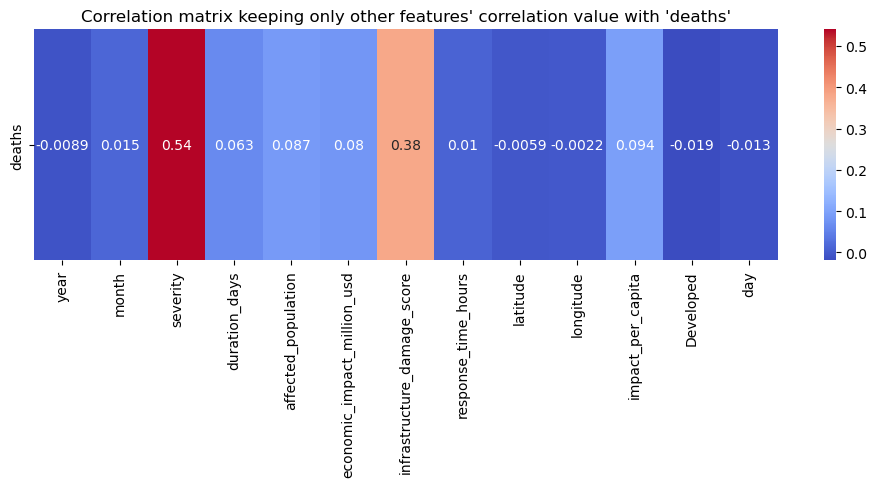

In [16]:
plt.figure(figsize=(12, 3)) # Creation of the figure

# We define the correlation matrix for quantitative features only
# and we only keep the line for "death" (without considering "death" column).
matrix_deaths = df.corr(numeric_only=True)["deaths"].drop("deaths")

# We convert the matrix into a dataframe and print its transpose to have an horizontal result.
sns.heatmap(matrix_deaths.to_frame().T, annot = True, cmap = 'coolwarm')
plt.title("Correlation matrix keeping only other features' correlation value with 'deaths'")
plt.show()

It seems that for the moment, the most correlated features with *deaths* are *severity* (a slight correlation of 0.54) and *infrastructure_damage_score* (a slight correlation of 0.38).
<br>We can now do the same for *economic_impact_million_usd*.

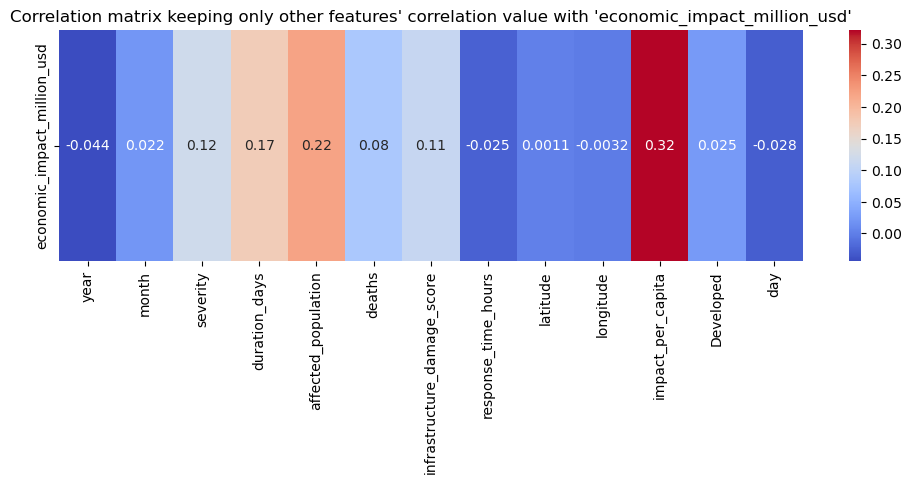

In [17]:
plt.figure(figsize=(12, 3)) # Creation of the figure

# We define the correlation matrix for quantitative features only and we only keep the line for
# the economic impact (without considering the economic impact column).
matrix_impact = df.corr(numeric_only=True)["economic_impact_million_usd"].drop("economic_impact_million_usd")

# We convert the matrix into a dataframe and print its transpose to have an horizontal result.
sns.heatmap(matrix_impact.to_frame().T, annot = True, cmap = 'coolwarm')
plt.title("Correlation matrix keeping only other features' correlation value with 'economic_impact_million_usd'")
plt.show()

It seems that for the moment, the most correlated features with *economic_impact_million_usd* are *impact_per_capita* (a slight correlation of 0.32) and *affected_population* (a very slight correlation of 0.22).

<br>

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**2. After "converting" qualitative features into binary ones**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;From what one can see, the two precedent correlation matrixes have a problem: they can only display the correlation between the target features (*deaths* and *economic_impact_million_usd*) and the other quantitative features, without considering the qualitative ones.
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In this dataset, we have 3 qualitative features: *event_id*, *country* and *event_type*. Therefore, we will use *pd.get_dummies* method to create one binary feature for each value taken by "country" and "event_type" (we still want to keep the event_id like that to identify the events). The parameter *drop_first = True* and *df.drop(...)* function will allow us to delete those features from the dataset afterwards. Finally, we will use *concat* method to gather in a single dataset the new binary features and the old ones.

In [18]:
temp = pd.get_dummies(df[["country", "event_type"]], drop_first = True)
temp = temp.astype(int) # We convert the "True"/"False" from the dummies to 0/1.
df_encoded = pd.concat([df.drop(columns=["country", "event_type"]), temp], axis=1)
print(f"Right now, we have {df_encoded.shape[0]} individuals and {df_encoded.shape[1]} features:")
df_encoded.head()

Right now, we have 3000 individuals and 76 features:


,event_id,year,month,severity,duration_days,affected_population,deaths,economic_impact_million_usd,infrastructure_damage_score,response_time_hours,...,event_type_Earthquake,event_type_Flood,event_type_Hailstorm,event_type_Heatwave,event_type_Hurricane,event_type_Landslide,event_type_Tornado,event_type_Tsunami,event_type_Volcanic Eruption,event_type_Wildfire
0,EV01539,2020,1,1,1,420956,0,0.01,4.9,11,...,0,0,0,0,0,0,0,1,0,0
1,EV02303,2020,1,1,4,3276,1,0.00,3.4,5,...,0,0,0,0,1,0,0,0,0,0
2,EV01796,2020,1,3,6,120382,0,0.10,8.9,10,...,0,0,0,0,0,0,0,0,0,0
3,EV00175,2020,1,6,16,185527,2,1.27,17.8,7,...,0,0,0,1,0,0,0,0,0,0
4,EV01115,2020,1,4,16,176642,2,2.01,18.7,17,...,0,0,0,0,0,0,0,0,0,1


<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We can now display again the correlation matrixes. Because we have 76 features (which is a lot), to enhance the visibility of the matrixes precedently plotted, we will apply a filter by keeping only the values with an absolute correlation value greater than 0.25 with the two target.

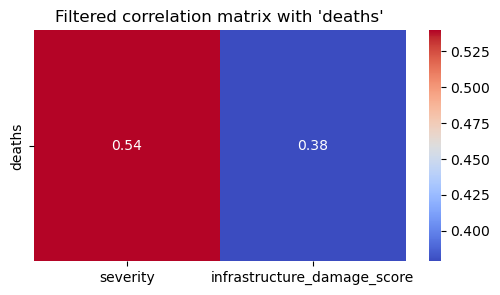

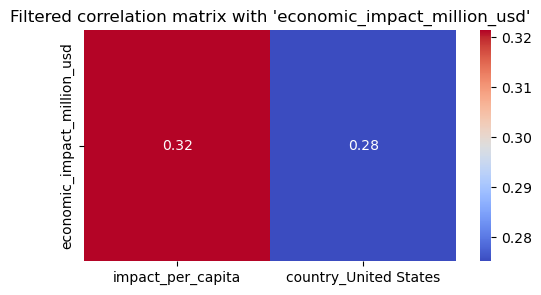

In [19]:
plt.figure(figsize=(6, 3)) # Creation of the figure

# We define the correlation matrix for quantitative features only
# and we only keep the line for "death" (without considering "death" column).
matrix_deaths = df_encoded.corr(numeric_only=True)["deaths"].drop("deaths")

# We apply the filter
matrix_filtered = matrix_deaths[abs(matrix_deaths) > 0.25]

# We convert the matrix into a dataframe and print its transpose to have an horizontal result.
sns.heatmap(matrix_filtered.to_frame().T, annot = True, cmap = 'coolwarm')
plt.title("Filtered correlation matrix with 'deaths'")
plt.show()



plt.figure(figsize = (6, 3))
# We define the correlation matrix for quantitative features only
# and we only keep the line for "economic_impact_million_usd" (without considering the target column).
matrix_impact = df_encoded.corr(numeric_only=True)["economic_impact_million_usd"].drop("economic_impact_million_usd")

# We apply the filter
matrix_filtered_impact = matrix_impact[abs(matrix_impact) > 0.25]

# We convert the matrix into a dataframe and print its transpose to have an horizontal result.
sns.heatmap(matrix_filtered_impact.to_frame().T, annot = True, cmap = 'coolwarm')
plt.title("Filtered correlation matrix with 'economic_impact_million_usd'")
plt.show()

In [20]:
df_encoded.to_csv("df_encoded.csv", index=False)


<br>

## Application of the PCA

Now that we prepared all the data, we need to create the adapted models, so that we can continue our study on the number of death and economic consequences of the storms.

However, we have a large dataset, this is why we need apply a PCA in order to see if a reduction of the dimension could help our model to perform better. So, for each model, we are going to apply one version with the PCA beforehand and another version without the PCA. In that way, we will be able to evaluate if it's necessary to reduce the dimensions in our dataset in order to have a performant model.

**Remove of the target variable:**

In [21]:
X = df_encoded.drop(columns = ["economic_impact_million_usd","event_id"]).copy()
y = df_encoded["economic_impact_million_usd"].copy()

**Standarization of the data using stantard scaler:**

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Choice of the main components' number:**

In order to choose the most adapted number of main components, we are going to aply the Elbow method. In order to do that, we only have to plot the graph using the explained variance ratio and the number of component will correspond to the moment where the curve is forming an elbow. 

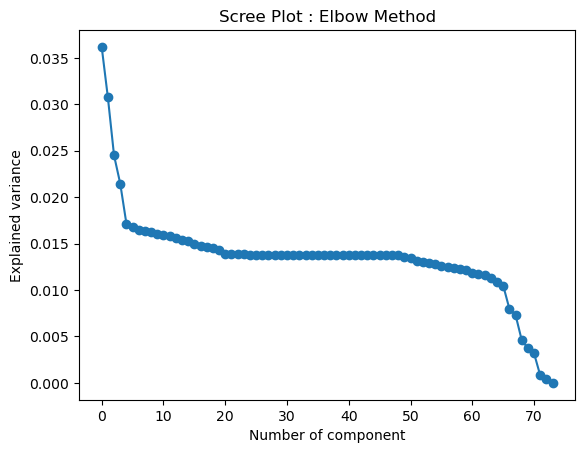

In [23]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_scaled)

plt.plot(pca.explained_variance_ratio_, marker='o')
plt.xlabel("Number of component")
plt.ylabel("Explained variance")
plt.title("Scree Plot : Elbow Method")
plt.show()

As we can see on the graph above, the elbow starts at the point where the explained variance is around 0.017, which is equivalent to a number of component that is equal to 4. So, let's apply the PCA with 4 main components.

**Creation of the PCA model:**

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)

**Application of the PCS on our dataset:**

In [25]:
pca.fit(X_scaled)

PCA(n_components=4)

**Projection of the data:**


In [26]:
x_pca = pca.transform(X_scaled)

**Main components:**

In [27]:
pca.components_

array([[-1.45567267e-02,  2.21239090e-02,  4.91153580e-01,
         3.21298623e-01,  1.28318248e-01,  3.53715238e-01,
         4.26412223e-01,  1.42520083e-02,  3.36554517e-02,
         1.73479294e-02,  3.24884642e-01,  4.42756305e-02,
        -9.11644567e-03,  2.40435401e-02,  2.16623756e-03,
        -2.09697097e-02, -1.28020799e-03, -2.87869539e-03,
         2.45807410e-05, -2.34292992e-02,  1.95981149e-02,
        -4.67750574e-02,  2.57698434e-02,  3.30249901e-02,
        -1.45751917e-02,  7.83423992e-03,  3.26194244e-02,
        -1.50856384e-02, -5.36404683e-03, -3.28343628e-03,
         4.26303636e-02,  3.42999366e-03, -7.93553985e-03,
         3.15499297e-02,  4.49045528e-03,  1.45756914e-02,
        -6.79265270e-03, -2.49328735e-02, -1.76702802e-02,
        -2.58497602e-02,  1.86601300e-02, -3.75828507e-03,
        -2.48276261e-02,  1.05620958e-02, -3.55868375e-02,
        -3.25593884e-03,  7.29052011e-03, -2.60611825e-02,
        -1.03071024e-02,  4.89305048e-03,  1.17281972e-0

**Explained variance and cumulative explained variance:**

In [28]:
pca.explained_variance_
pca.explained_variance_ratio_
explained_var = np.cumsum(pca.explained_variance_ratio_)

**Projection of the X_pca into the original coordinate system:**

In [29]:
X_new = pca.inverse_transform(x_pca)

**Results:**

In [30]:
print("Results of the PCA")
print("Data after the PCA", x_pca)
print("Main component", pca.components_)
print("Explained variance:", pca.explained_variance_ratio_)

Results of the PCA
Data after the PCA [[-1.99032173 -1.08280664 -0.55593419  0.8114126 ]
 [-2.01989164 -1.18609501  0.14615815  0.61375215]
 [ 0.07090179 -1.31256899  0.68053861  0.76117228]
 ...
 [-0.3638037   1.30741085  1.26502786 -0.4517871 ]
 [ 1.16281175  0.8274837   3.59528526 -0.34462107]
 [-0.39392051 -0.53657652 -0.48981429  1.35399021]]
Main component [[-1.45567267e-02  2.21239090e-02  4.91153580e-01  3.21298623e-01
   1.28318248e-01  3.53715238e-01  4.26412223e-01  1.42520083e-02
   3.36554517e-02  1.73479294e-02  3.24884642e-01  4.42756305e-02
  -9.11644567e-03  2.40435401e-02  2.16623756e-03 -2.09697097e-02
  -1.28020799e-03 -2.87869539e-03  2.45807410e-05 -2.34292992e-02
   1.95981149e-02 -4.67750574e-02  2.57698434e-02  3.30249901e-02
  -1.45751917e-02  7.83423992e-03  3.26194244e-02 -1.50856384e-02
  -5.36404683e-03 -3.28343628e-03  4.26303636e-02  3.42999366e-03
  -7.93553985e-03  3.15499297e-02  4.49045528e-03  1.45756914e-02
  -6.79265270e-03 -2.49328735e-02 -1.7670

**Loadings matrix:**

The loadings matrix is going to help us to know how much each variables contirbutes to each component, here we printed only 10 variables between all the features that we have.  

In [31]:
loadings = pd.DataFrame(pca.components_.T,index=X.columns,columns=["PC1","PC2","PC3","PC4"])
loadings.head(10)


,PC1,PC2,PC3,PC4
year,-0.014557,0.017969,-0.081346,0.004076
month,0.022124,0.022832,0.071515,-0.085909
severity,0.491154,0.108285,-0.263420,-0.080764
duration_days,0.321299,-0.141306,0.487766,-0.037501
affected_population,0.128318,0.369039,0.056357,0.551299
deaths,0.353715,0.098689,-0.208796,-0.094013
infrastructure_damage_score,0.426412,0.117471,-0.248611,-0.070281
response_time_hours,0.014252,-0.032350,-0.024836,0.020825
latitude,0.033655,-0.025483,-0.016936,-0.027295
longitude,0.017348,-0.000790,0.002540,-0.054069


Now let's put them in an ascendant way in order to see the tenth first variables that contributes the most to each component.

In [32]:
for pc in ["PC1", "PC2", "PC3", "PC4"]:
    print("\nTop variables for",pc)
    print(loadings[pc].abs().sort_values(ascending=False).head(10))


Top variables for PC1
severity                        0.491154
infrastructure_damage_score     0.426412
deaths                          0.353715
impact_per_capita               0.324885
duration_days                   0.321299
event_type_Heatwave             0.219017
event_type_Drought              0.201679
event_type_Earthquake           0.182114
event_type_Volcanic Eruption    0.170095
event_type_Tsunami              0.163878
Name: PC1, dtype: float64

Top variables for PC2
Developed                      0.572757
affected_population            0.369039
country_India                  0.265750
impact_per_capita              0.264040
country_China                  0.174928
duration_days                  0.141306
infrastructure_damage_score    0.117471
severity                       0.108285
country_Pakistan               0.103695
country_Brazil                 0.103615
Name: PC2, dtype: float64

Top variables for PC3
duration_days                  0.487766
event_type_Drought           

According to the results, we see that the first component regroup those variables :  everity,infrastructure_damage_score, deaths, impact_per_capita, duration_days, event_type_Heatwave,event_type_Drought,event_type_Earthquake, event_type_Volcanic Eruption and  event_type_Tsunami. Those variables are mainly the one that represents the impacts and therefore the global severity of a disaster. In other words, it shows how the natural disaster is destructive, dangerous, deadful and costly. An event with a high PC1 is going to be very damageful and on the contrary, one with a low PC1 has a little impact.

The second component mainly regroup variables that are related to the location of the natural disaster, the nature of the country (developped or no) and proportion of the population that is affected. This, allows us to differenciate the people that are in a developped country with the ones that are in the least developped countries. 

The thrid compoenent regroup variables that discribe the nature of the disaster. However, we still have variables that doesn't relate to this topic, especially the ones related to the impacts such as the number of death.

The fourth one is similary to the second one as it regorup variables linked to the location of the disaster. 

Finally, we can say that this PCA mainly allowed us to segment the variables into four directions. 



# II. Creation and application of the models

## Prediction of the Economic Impact

As we mentionned before, our goal is to analyse the impact of the natural disasters and understand how the consequences can differ depending on wether it occurs in a devlopped country or not.
At first, we are going to analyse the economic impact of the disasters.In order to do that, we need to predict the economic impact and then we will analyze the results for the two different categories of countries. For the purpose of making this prediction, we will apply a multiple linear regression model. However, as we said before, because of the spacious dimensions of our dataset, we are going to try this model on the PCA that we prepared just before and in parallel with that we will apply the model on the cleaned dataset without the PCA on it. Moreover, the PCA showed us that the variables are very correlated and therefore at first sight the best method appears to be an application of the multiple linar regression after the PCA.

### Application of the multiple linear regression on the PCA

In [33]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)

model = LinearRegression()

model.fit(X_train_pca,y_train)

Coef=model.coef_

Intercept=model.intercept_

predict_train = model.predict(X_train_pca)
predict_test = model.predict(X_test_pca)

**Results:**

In [34]:
print("R² train:", r2_score(y_train, predict_train))
print("R² test:", r2_score(y_test, predict_test))
print("RMSE test:", np.sqrt(mean_squared_error(y_test, predict_test)))

R² train: 0.15907559052677567
R² test: 0.06417418640247796
RMSE test: 30.277962209236197


According to the results of the multiple regression model, we see that the R^2 is very low with 0.15 for the training and 0.06 for the testing. This conduct us to say that the variables of our dataset are not linearly dependant with the target variable. Here, the PCA deleted a lot of information that could be interesting, espacially for the ones that are directly linked to the economic impact. 
Finally, we can say that the PCA does not improve our model and it doesn't give efficient results. The solution would be to test the model without the PCA in order to see if the PCA is the cause of the model powerlessness. 

### Application of the multiple linear regression without the PCA

### Application of Gradient Boosting Regressor

As we saw before, the multiple linear regression doesn't fit well to our dataset as our variables doesn't have linear correlations. Indeed, we don't have a lot of variables that are linearly correlated to the economic impact and we don't have that much variables that contributes to analyse the economic impact. Moreover, our PCA lost a lot of informations from the datatset and therefore it didn't improve our analysis. This is why we chose to apply a Gradient Boosting Regressor, without the PCA. 

Indeed, the Gradient Boosting Regressor is adapted to our problem as it's a model that capture the complex relations and fits well to heterogeneous data, thanks to the process of erasing errors of the previous trees that he has created while he is still creating new ones. Moreover, as we are predicting economic values, the outliers might be binding. So, a boosting method could be adapted as reduce bias.

Concerning, the implementation of GradientBoostingRegressor, we chose to apply the parameters by fault in order to see how our model react to the data, its performance and also to see wether there is an overfitting or no.

In [35]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbr_default = GradientBoostingRegressor(random_state=42)

gbr_default.fit(X_train, y_train)

y_pred_train_default = gbr_default.predict(X_train)
y_pred_test_default  = gbr_default.predict(X_test)

print("GradientBoostingRegressor by default")
print("R² train :", r2_score(y_train, y_pred_train_default))
print("R² test  :", r2_score(y_test,  y_pred_test_default))
print("RMSE test:", np.sqrt(mean_squared_error(y_test, y_pred_test_default)))


GradientBoostingRegressor by default
R² train : 0.9969901732816308
R² test  : 0.5563529574289924
RMSE test: 20.84720935368667


**Interpretation of the model by default results:**

Our GradientBoostingRegressor model obtained an "R² train" equal to 99% which means that he explains 99% of the target variable's variance in the training set. This confirm what we said before about the GradientBoostingRegressor model. Indeed, such a training R² score means that our model is capable of capturing complex and non linear relations between the economic variable (target variable) and the features.
Concerning the "R² test", we obtained 55% which means that the model explains 55% of the variance on data that he hasn't seen before. However, as we are predicting economic data, this score is concordent as it has taken into account the "hetegonerous" character of the data. 

However, comparing "R² train" and "R² test" scores, we see that we have a real difference, which can lead us to think about a possible overfitting. Indeed, with an "R² train" of 99% and an "R² test" of 56%, the model learn well on the train but in the testing phase he lose in precision. This conduct us to say that we need to apply a GridSearchCV in order to find parameters that can avoid this slight overfitting. Moreover, the RMSE delivered a result of 20%, which can still be considered as reasonable in the context of a study of an economic impact. 


### GradientBoostingRegressor with GridSearchCV

As we said before, the model by default tend to overfit a little, this is why we are going to apply a GridSearchCV in order to choose the best parameters and therefore having the best performance of our model.

Concerning the parameters for the GridSearchCV in the "param_grid", we chose different values for the model testings. Concerning the "n_estimators" which correspond to the number of trees in global, we chose the combination of [100, 200, 300]. Indeed, by increasing this value, the model will be more flexible. Those three different level values, will allows to see if the R² will increase without of course making the overfitting more consequent. 

Concerning the "learning_rate", it's bsaically the size of the step size with which each new tree corrects errors. The value by default is equal to "1" and it's interesting to have it as a comparison value. We also decided to choose the value "0.05" in order to see the difference when the model is slower. This is why the combination [0.05, 0.1] appears to be the best one.

Concerning the "max_depth", we chose [3, 4], which are basically the most utilized values for the deepeness of the tree in general. Indeed, if we increase more this value, we will have a very complex result.

Concerning the "substample", we chose [0.8, 1.0], in order to see if the model perform better when he works only on 80% of the training set and therefore, to see if it reduce the overfitting. 

Concerning the "min_samples_leaf", we chose [1, 3, 5], in order to test values that avoid the trees' adapting to the noisy economic values. 

Finally, for the GridSearchCV parameters, we chose to put "r2" for the scoring as it's the score that we want to optimize. For the cross validation, we chose to put 5 folds so that we can have a more stable balance between estimation stability and computation time. 

In [36]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbr = GradientBoostingRegressor(random_state=42)

param_grid = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.05, 0.1],
    "max_depth": [3, 4],
    "subsample": [0.8, 1.0],
    "min_samples_leaf": [1, 3, 5]
}

grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    scoring="r2",   
    cv=5,         
    n_jobs=-1,     
    verbose=2       
)

grid_search.fit(X_train, y_train)

print("Best hyperparameters found :")
print(grid_search.best_params_)
print("Best average score in CV (R²) :", grid_search.best_score_)

best_gbr = grid_search.best_estimator_


y_pred_train = best_gbr.predict(X_train)
y_pred_test  = best_gbr.predict(X_test)

y_pred_global = best_gbr.predict(X)
r2_global = r2_score(y, y_pred_global)

print("\nGradientBoostingRegressor with GridSearchCV")
print("R² train :", r2_score(y_train, y_pred_train))
print("R² test  :", r2_score(y_test,  y_pred_test))
print("RMSE test:", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("R² global :", r2_global)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, n_estimators=100, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, n_estimators=100, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, n_estimators=100, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.0

**Interpretation fo the results with GridSearchCV:**

## Prediction of the number of death

### GradientBoostingClassifier with GridSearchCV

In [55]:
X = df_encoded.drop(columns = ["deaths","event_id"]).copy()
y = df_encoded["deaths"].copy()

In [56]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbr = GradientBoostingRegressor(random_state=42)

param_grid = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.05, 0.1],
    "max_depth": [3, 4],
    "subsample": [0.8, 1.0],
    "min_samples_leaf": [1, 3, 5]
}

grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    scoring="r2",   
    cv=5,         
    n_jobs=-1,     
    verbose=2       
)

grid_search.fit(X_train, y_train)

print("Best hyperparameters found :")
print(grid_search.best_params_)
print("Best average score in CV (R²) :", grid_search.best_score_)

best_gbr = grid_search.best_estimator_


y_pred_train = best_gbr.predict(X_train)
y_pred_test  = best_gbr.predict(X_test)

y_pred_global = best_gbr.predict(X)
r2_global = r2_score(y, y_pred_global)

print("\nGradientBoostingRegressor with GridSearchCV")
print("R² train :", r2_score(y_train, y_pred_train))
print("R² test  :", r2_score(y_test,  y_pred_test))
print("RMSE test:", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("R² global :", r2_global)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, n_estimators=100, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, n_estimators=100, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, n_estimators=100, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.0

# Draft and testings

In [39]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    random_state=42
)

gbr.fit(X_train, y_train)

y_pred_train = gbr.predict(X_train)
y_pred_test  = gbr.predict(X_test)

print("GradientBoostingRegressor")
print("R² train :", r2_score(y_train, y_pred_train))
print("R² test  :", r2_score(y_test,  y_pred_test))
print("RMSE test:", np.sqrt(mean_squared_error(y_test, y_pred_test)))


GradientBoostingRegressor
R² train : 0.9891599444200514
R² test  : 0.4190805841073334
RMSE test: 23.85542061347135


In [40]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly  = poly.transform(X_test_scaled)

print("Shape X_train original :", X_train.shape)
print("Shape X_train_poly     :", X_train_poly.shape)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred_train = model.predict(X_train_poly)
y_pred_test  = model.predict(X_test_poly)

r2_train = r2_score(y_train, y_pred_train)
r2_test  = r2_score(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("R² train (poly deg=2, without Ridge) :", r2_train)
print("R² test  (poly deg=2, without Ridge) :", r2_test)
print("RMSE test                         :", rmse_test)


Shape X_train original : (2400, 73)
Shape X_train_poly     : (2400, 2774)
R² train (poly deg=2, without Ridge) : 0.8805394024813177
R² test  (poly deg=2, without Ridge) : -7.259104605817542e+20
RMSE test                         : 843277785264.9518


In [41]:
from sklearn.svm import SVR

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

model = SVR(kernel="rbf", C=1.0, gamma="scale")

model.fit(X_train_s, y_train)

y_pred_test = model.predict(X_test_s)

print("R² test (SVR):", r2_score(y_test, y_pred_test))
print("RMSE test (SVR):", np.sqrt(mean_squared_error(y_test, y_pred_test)))

R² test (SVR): 0.01343581556375939
RMSE test (SVR): 31.087929965183314


In [42]:
from sklearn.ensemble import GradientBoostingRegressor

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    random_state=42
)

gbr.fit(X_train, y_train)

y_pred_test = gbr.predict(X_test)

print("GradientBoostingRegressor")

r2 = r2_score(y_test, y_pred_test)
print("R² :", r2)
print("R² train :", r2_score(y_train, y_pred_train))
print("R² test (GBR):", r2_score(y_test, y_pred_test))
print("RMSE test (GBR):", np.sqrt(mean_squared_error(y_test, y_pred_test)))

GradientBoostingRegressor
R² : 0.4190805841073334
R² train : 0.8805394024813177
R² test (GBR): 0.4190805841073334
RMSE test (GBR): 23.85542061347135


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

xgb = XGBRegressor(
    objective="reg:squarederror",
    random_state=42,

    n_estimators=600,
    learning_rate=0.03,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,

    reg_lambda=10,
    reg_alpha=5
)

xgb.fit(X_train, y_train)

y_pred_train = xgb.predict(X_train)
y_pred_test  = xgb.predict(X_test)

print("XGBoost")
r2 = r2_score(y_test, y_pred_test)
print("R² :", r2)
print("R² train :", r2_score(y_train, y_pred_train))
print("R² test  :", r2_score(y_test, y_pred_test))
print("RMSE test:", np.sqrt(mean_squared_error(y_test, y_pred_test)))


XGBoost
R² : 0.3502738494856147
R² train : 0.9250678893052552
R² test  : 0.3502738494856147
RMSE test: 25.228667077013494


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

svr = Pipeline([
    ("scaler", StandardScaler()),
    ("svr", SVR(
        kernel="rbf",
        C=10.0,
        epsilon=0.2
    ))
])

svr.fit(X_train, y_train)

y_pred_train = svr.predict(X_train)
y_pred_test  = svr.predict(X_test)

print("SVR")
r2 = r2_score(y_test, y_pred_test)
print("R² :", r2)
print("R² train :", r2_score(y_train, y_pred_train))
print("R² test  :", r2_score(y_test, y_pred_test))
print("RMSE test:", np.sqrt(mean_squared_error(y_test, y_pred_test)))


SVR
R² : 0.06717159860426358
R² train : 0.28864922780825975
R² test  : 0.06717159860426358
RMSE test: 30.229433775716856


As we saw before, the PCA didn't get very performant

Première colonne de X_train : year
['year', 'month', 'severity', 'duration_days', 'affected_population', 'deaths', 'infrastructure_damage_score', 'response_time_hours', 'latitude', 'longitude', 'Developed', 'day', 'country_Australia', 'country_Austria', 'country_Bangladesh', 'country_Belgium', 'country_Brazil', 'country_Canada', 'country_Chile', 'country_China', 'country_Colombia', 'country_Czech Republic', 'country_Denmark', 'country_Egypt', 'country_Finland', 'country_France', 'country_Germany', 'country_Greece', 'country_Hungary', 'country_India', 'country_Indonesia', 'country_Iraq', 'country_Ireland', 'country_Israel', 'country_Italy', 'country_Japan', 'country_Kazakhstan', 'country_Malaysia', 'country_Mexico', 'country_Netherlands', 'country_New Zealand', 'country_Nigeria', 'country_Pakistan', 'country_Peru', 'country_Philippines', 'country_Poland', 'country_Portugal', 'country_Qatar', 'country_Romania', 'country_Russia', 'country_Saudi Arabia', 'country_Singapore', 'country_South

<Axes: >

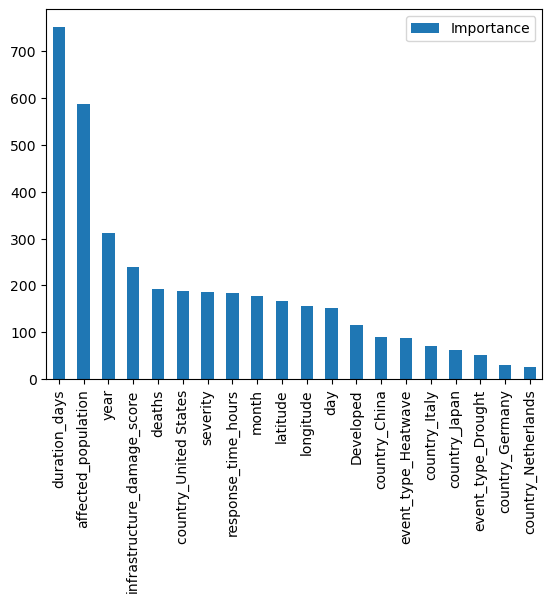

In [45]:
from xgboost import XGBRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Première colonne de X_train :", X_train.columns[0])

model = XGBRegressor(
    objective="reg:squarederror",  
    random_state=42,               
    max_depth=4,
    learning_rate=0.05,
    n_estimators=300,

    subsample=0.8,
    colsample_bytree=0.8,

    reg_lambda=5,
    reg_alpha=1,                    
)

model.fit(X_train, y_train)

booster = model.get_booster()
print(booster.feature_names)

y_pred = model.predict(X_test)

print("R² test :", r2_score(y_test, y_pred))
print("RMSE test :", np.sqrt(mean_squared_error(y_test, y_pred)))

print(model.get_booster().trees_to_dataframe().head())
booster = model.get_booster()

importances = booster.get_score(importance_type='weight')
# importance_type peut être : 'weight', 'gain', 'cover'
df_imp = pd.DataFrame.from_dict(importances, orient='index', columns=['Importance'])
df_imp = df_imp.sort_values(by='Importance', ascending=False)

print(df_imp.head(10))

df_imp.head(20).plot(kind='bar')




In [46]:
print(type(X_train))


<class 'pandas.core.frame.DataFrame'>


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f'R2 Score: {r2_score(y_test, y_pred):.3f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}')

R2 Score: 0.355
RMSE: 25.13


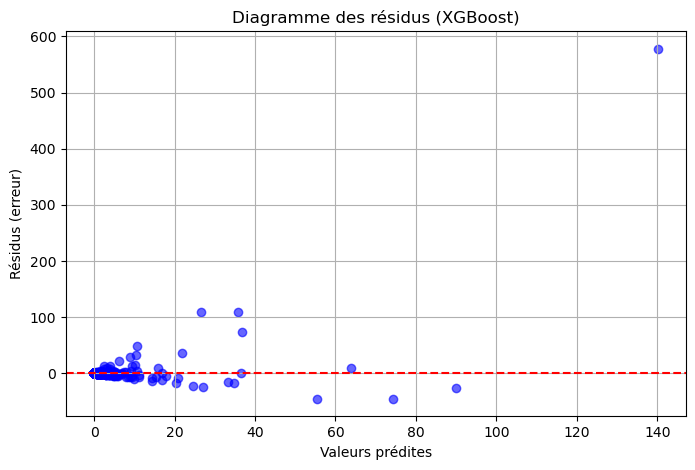

Scores R² par validation croisée : [ 0.1816  0.4316 -1.8074  0.4557 -0.3251]
R² moyen : -0.2127


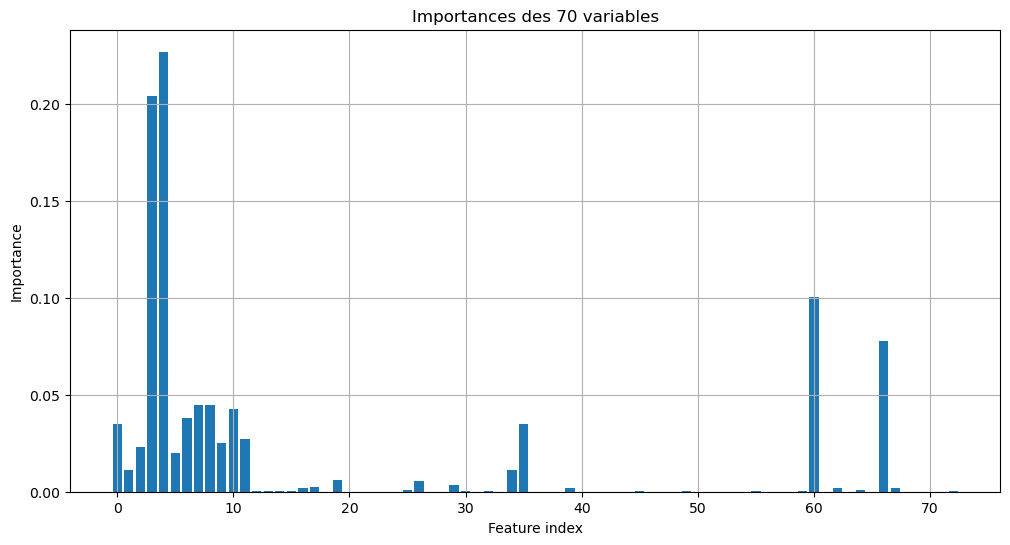

In [48]:

residuals = y_test - y_pred

plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals, color='blue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus (erreur)")
plt.title("Diagramme des résidus (XGBoost)")
plt.grid(True)
plt.show()

# 2️⃣ Validation croisée (R² sur 5 plis)
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Scores R² par validation croisée :", np.round(scores, 4))
print("R² moyen :", np.round(np.mean(scores), 4))

# 3️⃣ Importance des features

import matplotlib.pyplot as plt
importances = model.feature_importances_
plt.figure(figsize=(12,6))
plt.bar(range(len(importances)), importances)
plt.xlabel("Feature index")
plt.ylabel("Importance")
plt.title("Importances des 70 variables")
plt.grid(True)
plt.show()

In [49]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
model = XGBRegressor(
    objective="reg:squarederror",
    random_state=42,
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8
)

cv = KFold(n_splits=5, shuffle=True, random_state=42)

results = cross_validate(
    model,
    X, y,
    cv=cv,
    scoring="r2",
    return_train_score=True
)

print("R² train par fold :", results["train_score"])
print("R² test  par fold :", results["test_score"])
print("R² train moyen :", results["train_score"].mean())
print("R² test  moyen :", results["test_score"].mean())

R² train par fold : [0.98104105 0.99322195 0.99315221 0.99324439 0.99325239]
R² test  par fold : [ 0.4564778  -0.18382386  0.19497772 -0.93784422 -1.30898243]
R² train moyen : 0.9907823956915257
R² test  moyen : -0.3558389973801993


R² train (XGB without parameter to avoid overfitting) : 0.6554871884863144
R² test  (XGB without parameter to avoid overfitting) : 0.3458632937846623
RMSE test (XGB without parameter to avoid overfitting): 25.31415250886645


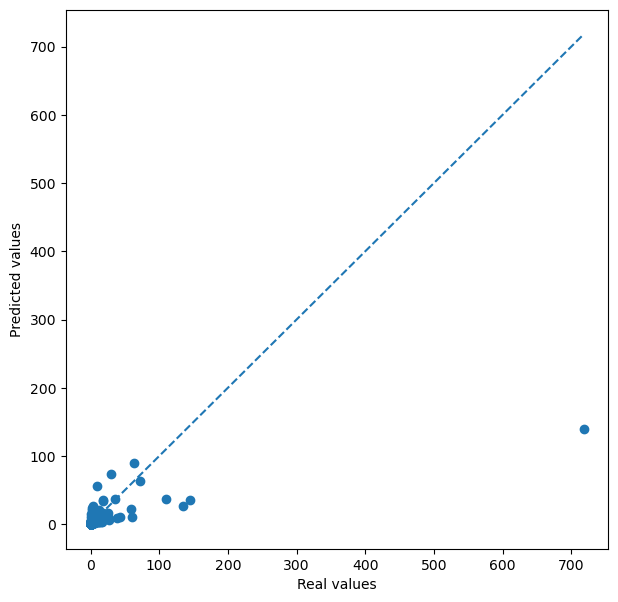

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = XGBRegressor(
    objective="reg:squarederror",
    random_state=42,

    n_estimators=50,     
    max_depth=2,         
    learning_rate=0.3,   
    subsample=0.5,       
    colsample_bytree=0.5 
)

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test  = r2_score(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("R² train (XGB without parameter to avoid overfitting) :", r2_train)
print("R² test  (XGB without parameter to avoid overfitting) :", r2_test)
print("RMSE test (XGB without parameter to avoid overfitting):", rmse_test)

plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         linestyle='--')
plt.xlabel("Real values")
plt.ylabel("Predicted values")
plt.show()

II. PRÉPARATION DES DONNÉES POUR LE MACHINE LEARNING

 4. MODÈLE 1: RÉGRESSION LINÉAIRE MULTIPLE


Performances du modèle de Régression Linéaire:
------------------------------------------------------------
R² Score (Train): 0.2577
R² Score (Test):  0.1149
RMSE (Train):     6.8731
RMSE (Test):      29.4458
MAE (Train):      2.1888
MAE (Test):       4.0551


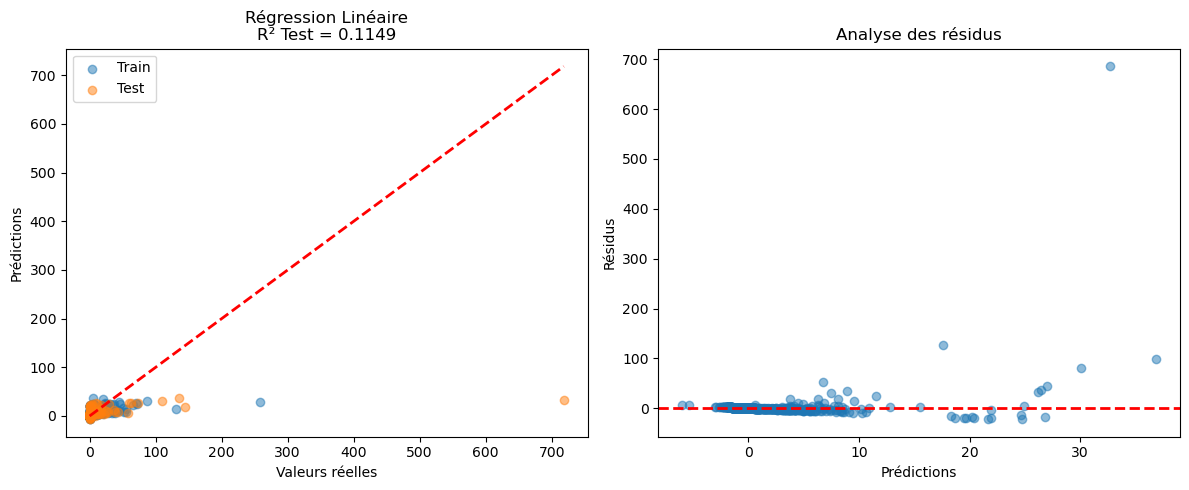

In [51]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

y_pred_train_lr = lr_model.predict(X_train_scaled)
y_pred_test_lr = lr_model.predict(X_test_scaled)


lr_train_r2 = r2_score(y_train, y_pred_train_lr)
lr_test_r2 = r2_score(y_test, y_pred_test_lr)
lr_train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train_lr))
lr_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test_lr))
lr_train_mae = mean_absolute_error(y_train, y_pred_train_lr)
lr_test_mae = mean_absolute_error(y_test, y_pred_test_lr)

print("\nPerformances du modèle de Régression Linéaire:")
print("-" * 60)
print(f"R² Score (Train): {lr_train_r2:.4f}")
print(f"R² Score (Test):  {lr_test_r2:.4f}")
print(f"RMSE (Train):     {lr_train_rmse:.4f}")
print(f"RMSE (Test):      {lr_test_rmse:.4f}")
print(f"MAE (Train):      {lr_train_mae:.4f}")
print(f"MAE (Test):       {lr_test_mae:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train_lr, alpha=0.5, label='Train')
plt.scatter(y_test, y_pred_test_lr, alpha=0.5, label='Test')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.title(f'Régression Linéaire\nR² Test = {lr_test_r2:.4f}')
plt.legend()

plt.subplot(1, 2, 2)
residuals = y_test - y_pred_test_lr
plt.scatter(y_pred_test_lr, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.title('Analyse des résidus')

plt.tight_layout()

5. MODÈLE 2: RANDOM FOREST REGRESSOR


Performances du modèle Random Forest:
------------------------------------------------------------
R² Score (Train): 0.6954
R² Score (Test):  0.2767
RMSE (Train):     4.4030
RMSE (Test):      26.6184
MAE (Train):      0.7213
MAE (Test):       2.8625


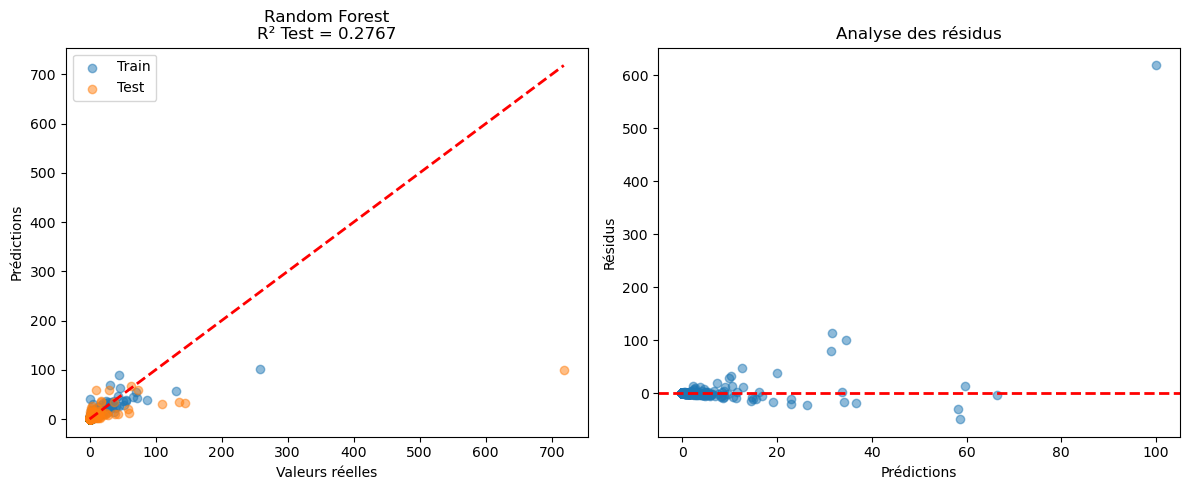

In [52]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10,
                                 min_samples_split=5, min_samples_leaf=2,
                                 random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

rf_train_r2 = r2_score(y_train, y_pred_train_rf)
rf_test_r2 = r2_score(y_test, y_pred_test_rf)
rf_train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train_rf))
rf_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test_rf))
rf_train_mae = mean_absolute_error(y_train, y_pred_train_rf)
rf_test_mae = mean_absolute_error(y_test, y_pred_test_rf)

print("\nPerformances du modèle Random Forest:")
print("-" * 60)
print(f"R² Score (Train): {rf_train_r2:.4f}")
print(f"R² Score (Test):  {rf_test_r2:.4f}")
print(f"RMSE (Train):     {rf_train_rmse:.4f}")
print(f"RMSE (Test):      {rf_test_rmse:.4f}")
print(f"MAE (Train):      {rf_train_mae:.4f}")
print(f"MAE (Test):       {rf_test_mae:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train_rf, alpha=0.5, label='Train')
plt.scatter(y_test, y_pred_test_rf, alpha=0.5, label='Test')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.title(f'Random Forest\nR² Test = {rf_test_r2:.4f}')
plt.legend()

plt.subplot(1, 2, 2)
residuals_rf = y_test - y_pred_test_rf
plt.scatter(y_pred_test_rf, residuals_rf, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.title('Analyse des résidus')

plt.tight_layout()

 6. COMPARAISON DES MODÈLES

In [53]:
comparison = pd.DataFrame({
    'Modèle': ['Régression Linéaire', 'Random Forest'],
    'R² Train': [lr_train_r2, rf_train_r2],
    'R² Test': [lr_test_r2, rf_test_r2],
    'RMSE Train': [lr_train_rmse, rf_train_rmse],
    'RMSE Test': [lr_test_rmse, rf_test_rmse],
    'MAE Train': [lr_train_mae, rf_train_mae],
    'MAE Test': [lr_test_mae, rf_test_mae]
})

print("\nTableau comparatif:")
print(comparison.to_string(index=False))



Tableau comparatif:
             Modèle  R² Train  R² Test  RMSE Train  RMSE Test  MAE Train  MAE Test
Régression Linéaire  0.257672 0.114906    6.873095  29.445829   2.188756  4.055095
      Random Forest  0.695357 0.276719    4.403017  26.618444   0.721314  2.862549


7. PRÉDICTIONS PAR TYPE D'ÉVÉNEMENT

In [54]:
df_results = df_processed.iloc[X_test.index].copy()
df_results['deaths_real'] = y_test.values
df_results['deaths_pred_lr'] = y_pred_test_lr
df_results['deaths_pred_rf'] = y_pred_test_rf

event_analysis = df_results.groupby('event_type').agg({
    'deaths_real': ['mean', 'std', 'count'],
    'deaths_pred_lr': 'mean',
    'deaths_pred_rf': 'mean'
}).round(2)

print("\nMoyenne des décès par type d'événement:")
print(event_analysis)

NameError: name 'df_processed' is not defined

In [ ]:
print("\n✅ Meilleur modèle:", "Random Forest" if rf_test_r2 > lr_test_r2 else "Régression Linéaire")
print(f"   R² Score: {max(rf_test_r2, lr_test_r2):.4f}")